In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [514]:
df = pd.read_csv("data/wine-quality Red.csv", sep=",")
df.shape

(1599, 12)

In [515]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Mô tả các đặc trưng trong dữ liệu rượu

- **fixed acidity**: Lượng **axit cố định** trong rượu *(g/dm³)*. Ảnh hưởng đến **độ chua** và **cảm giác trên lưỡi**.

- **volatile acidity**: Lượng **axit dễ bay hơi** *(g/dm³)*. **Quá cao** sẽ làm rượu **có mùi giấm**.

- **citric acid**: Hàm lượng **axit citric** *(g/dm³)*. **Làm tăng độ tươi mát** cho rượu.

- **residual sugar**: Lượng **đường còn lại** sau khi lên men *(g/dm³)*. **Quyết định độ ngọt** của rượu.

- **chlorides**: Hàm lượng **muối (NaCl)** trong rượu *(g/dm³)*. **Quá nhiều** sẽ làm rượu **có vị mặn**.

- **free sulfur dioxide**: Lượng **SO₂ tự do** *(mg/dm³)*. **Ảnh hưởng đến khả năng bảo quản** rượu.

- **total sulfur dioxide**: Tổng lượng **SO₂** *(mg/dm³)*. Nếu quá nhiều có thể **gây mùi khó chịu**.

- **density**: **Mật độ của rượu** *(g/cm³)*. **Liên quan đến hàm lượng cồn và đường còn lại**.

- **pH**: **Độ pH** của rượu. **Giá trị thấp (<3) rượu sẽ chua hơn**.

- **sulphates**: Hàm lượng **sulfat** *(g/dm³)*. **Giúp bảo quản và ảnh hưởng đến cảm giác rượu**.

- **alcohol**: Hàm lượng **cồn** *(%)*. **Ảnh hưởng đến vị mạnh và độ đậm của rượu**.

- **quality**: **Điểm số chất lượng của rượu** *(thang điểm 0-10)*. **Được đánh giá bởi chuyên gia nếm rượu**.


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [517]:
# df.duplicated().sum()

In [518]:
# df = df.drop_duplicates()

In [519]:
# df.info()

In [520]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [521]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5, 1.0, 'Phân bố chất lượng rượu')

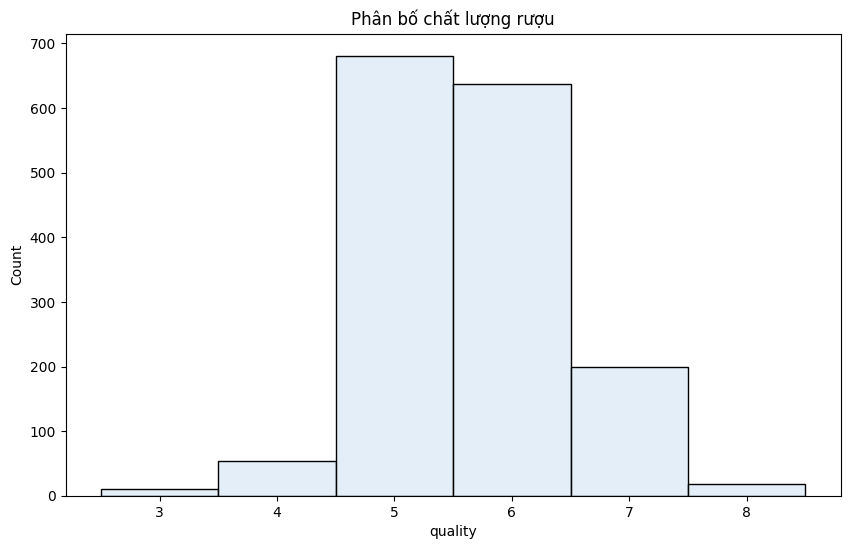

In [522]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], discrete=True, binwidth=1)
plt.title('Phân bố chất lượng rượu')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

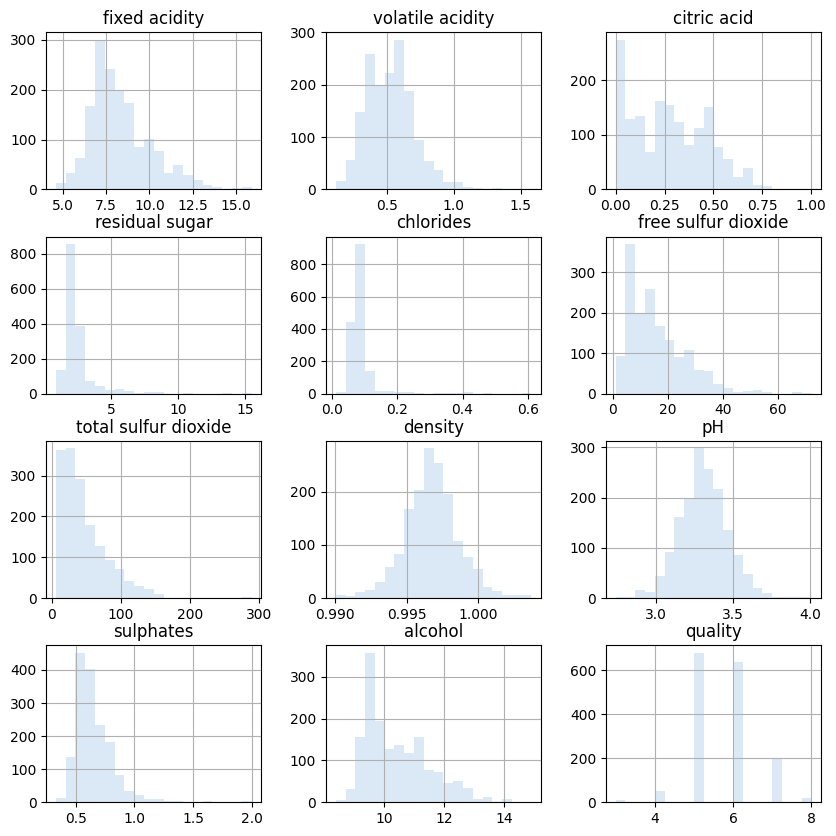

In [523]:
df.hist(bins=20, figsize=(10, 10))

### **Chia dữ liệu thành 3 nhóm chính**

- **Nhóm 1: Đặc tính hóa học của rượu (Axit, muối, sulfat, pH)**

    - fixed acidity (Axit cố định)
    - volatile acidity (Axit bay hơi)
    - citric acid (Axit citric)
    - pH (Độ pH)
    - chlorides (Muối)
    - sulphates (Sulfat)

- **Nhóm 2: Đường, lưu huỳnh và mật độ (ảnh hưởng đến độ ngọt & bảo quản)**

    - residual sugar (Lượng đường còn lại)
    - density (Mật độ)
    - free sulfur dioxide (Lưu huỳnh tự do)
    - total sulfur dioxide (Tổng lưu huỳnh)

- **Nhóm 3: Nồng độ cồn và chất lượng rượu**

    - alcohol (Nồng độ cồn)
    - quality (Chất lượng - điểm đánh giá)

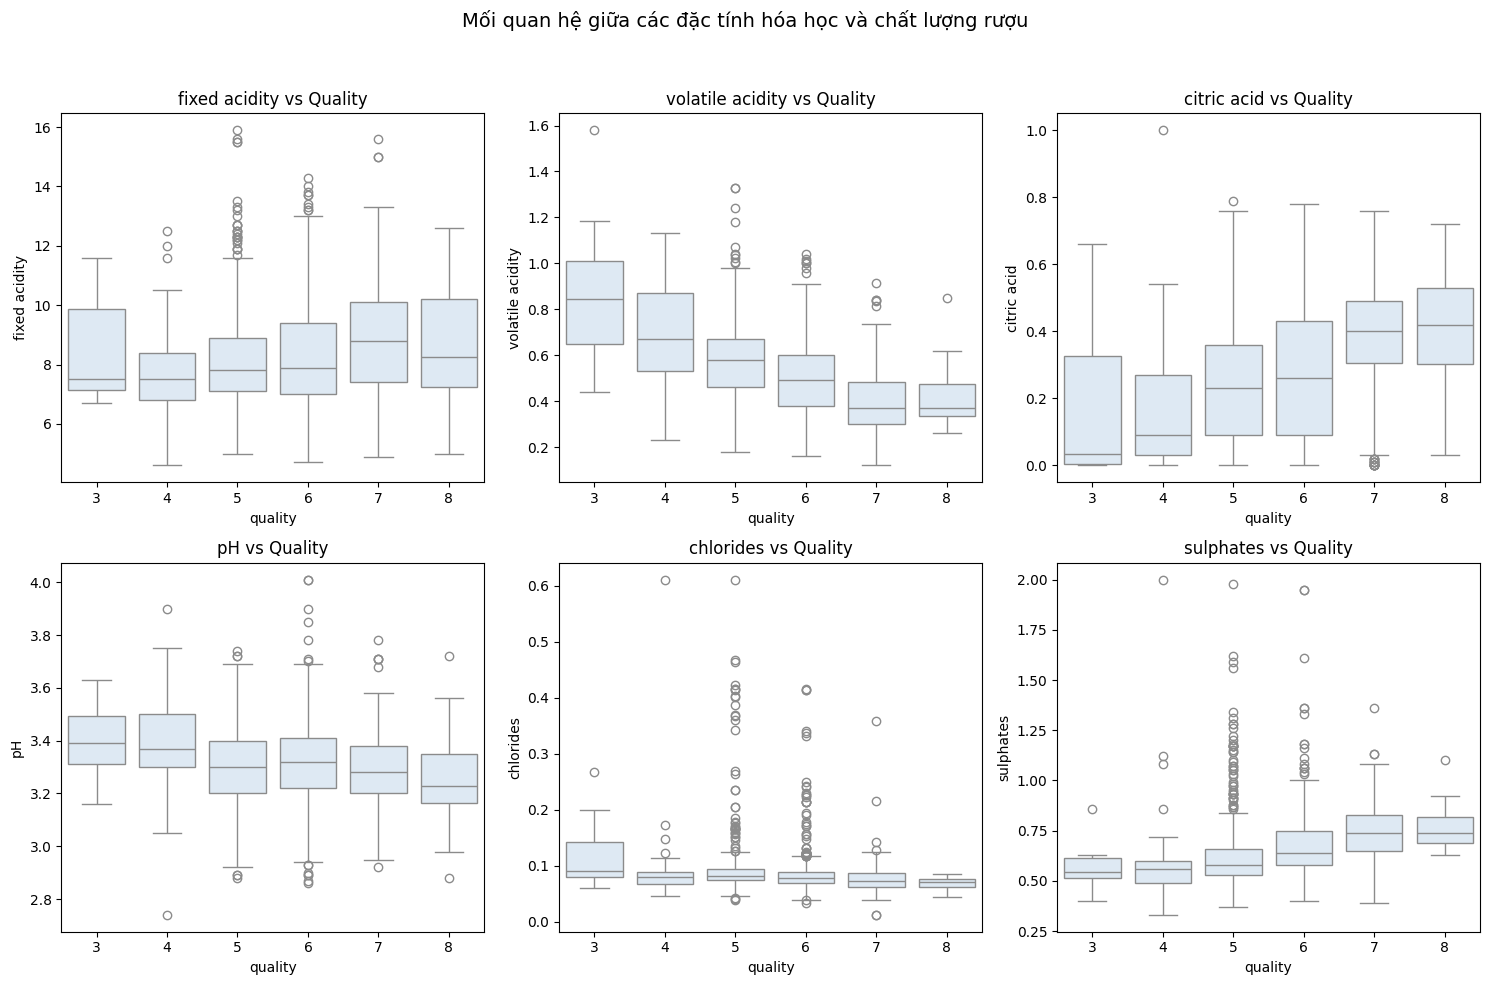

In [524]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Mối quan hệ giữa các đặc tính hóa học và chất lượng rượu", fontsize=14)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'chlorides', 'sulphates']

for i, col in enumerate(cols):
    sns.boxplot(x=df['quality'], y=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{col} vs Quality")

plt.tight_layout(rect=[0, 0, 1, 0.95])

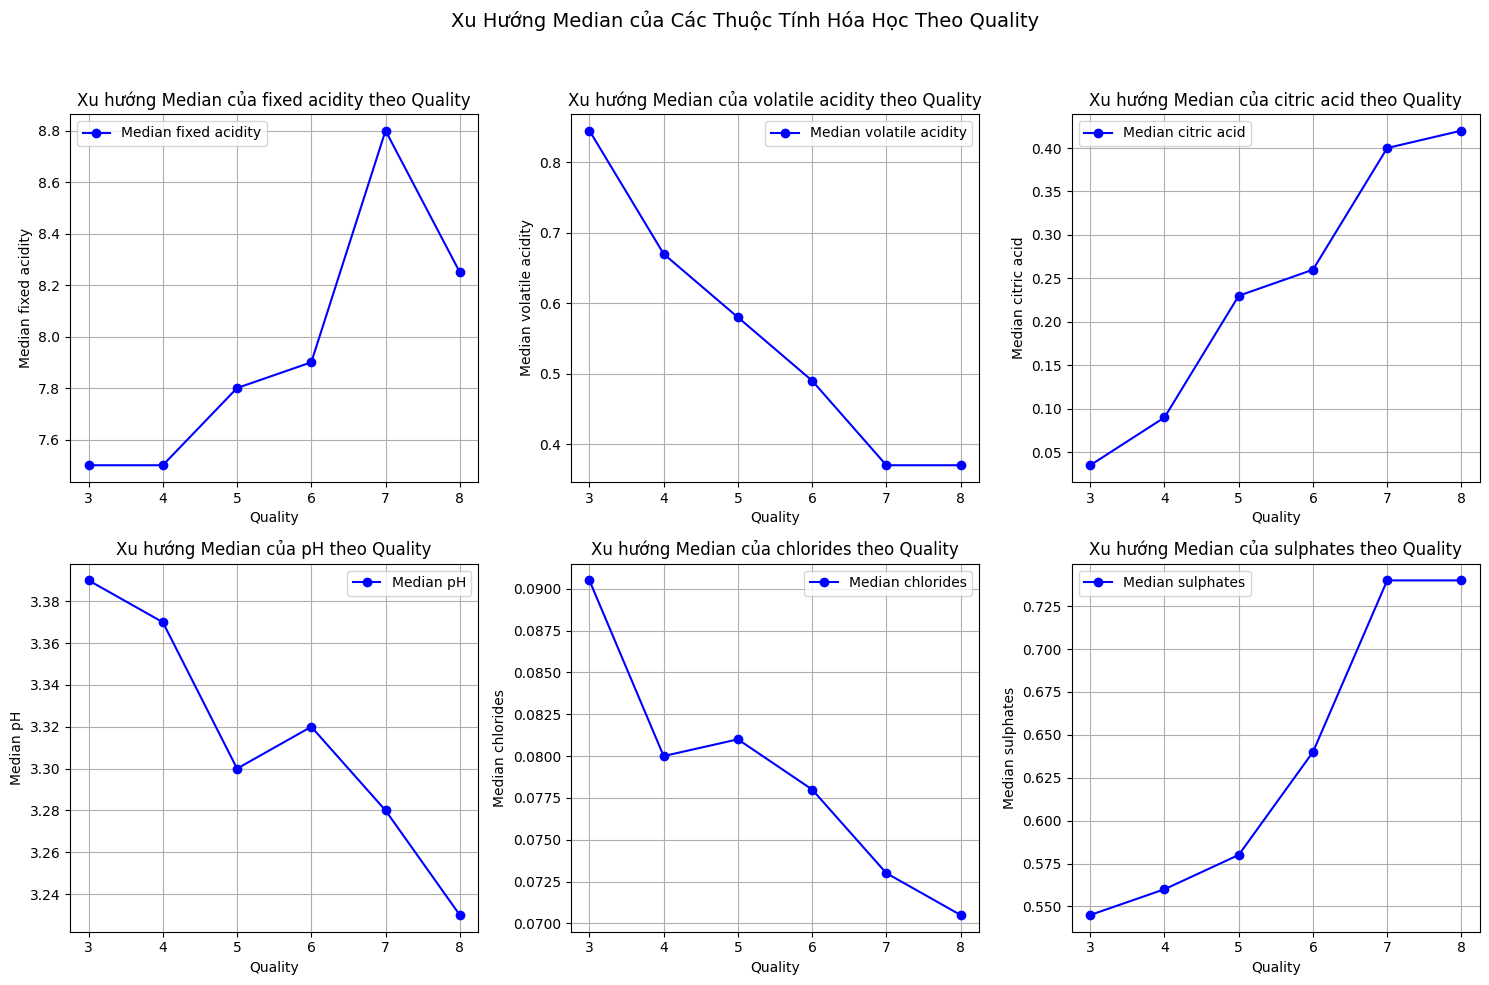

In [525]:
group1_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'chlorides', 'sulphates']

median_values = df.groupby('quality')[group1_features].median()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Xu Hướng Median của Các Thuộc Tính Hóa Học Theo Quality", fontsize=14)

for i, col in enumerate(group1_features):
    ax = axes[i // 3, i % 3]
    ax.plot(median_values.index, median_values[col], marker='o', linestyle='-', color='b', label=f"Median {col}")
    ax.set_title(f"Xu hướng Median của {col} theo Quality")
    ax.set_xlabel("Quality")
    ax.set_ylabel(f"Median {col}")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Bảng tổng hợp xu hướng và nhận xét về mối quan hệ giữa các đặc trưng và quality

| Đặc trưng         | Xu hướng                                                           | Nhận xét |
|-------------------|------------------------------------------------------------------|----------|
| **Fixed Acidity** | Tăng nhẹ từ 3→6, đạt đỉnh ở 7, giảm ở 8.      | Quan hệ không tuyến tính. Quality cao (≈7) có xu hướng acid cố định cao hơn, nhưng mức 8 giảm lại → khả năng có tương tác với pH hoặc các acid khác. |
| **Volatile Acidity** | Giảm đều từ quality 3 đến 8. | Mối quan hệ âm rõ rệt: chất lượng cao gắn với volatile acidity thấp (giảm vị chua gắt/giấm). |
| **Citric Acid**   | Tăng dần theo quality, đặc biệt từ 5→8. | Liên hệ dương rõ: citric cao hơn giúp vị tươi và cân bằng hơn ở rượu chất lượng cao. |
| **pH**           | Giảm dần từ 3→8 (có nhô nhẹ ở 6).    | pH thấp (rượu axit hơn) xuất hiện ở quality cao hơn → acid tổng thể “đúng mức” cải thiện chất lượng. |
| **Chlorides**    | Giảm dần gần tuyến tính từ 3→8 (hơi nhích 4→5).  | Liên hệ âm rõ: chloride thấp (ít “mặn/khoáng”) đi kèm chất lượng cao. |
| **Sulphates**    | Tăng từ 3→7, gần như giữ nguyên ở 8.  | Tác động tích cực đến một ngưỡng (khoảng 7), sau đó bão hòa; cần kiểm soát liều lượng. |


Text(0.5, 1.0, 'Heatmap of Group 1 Features')

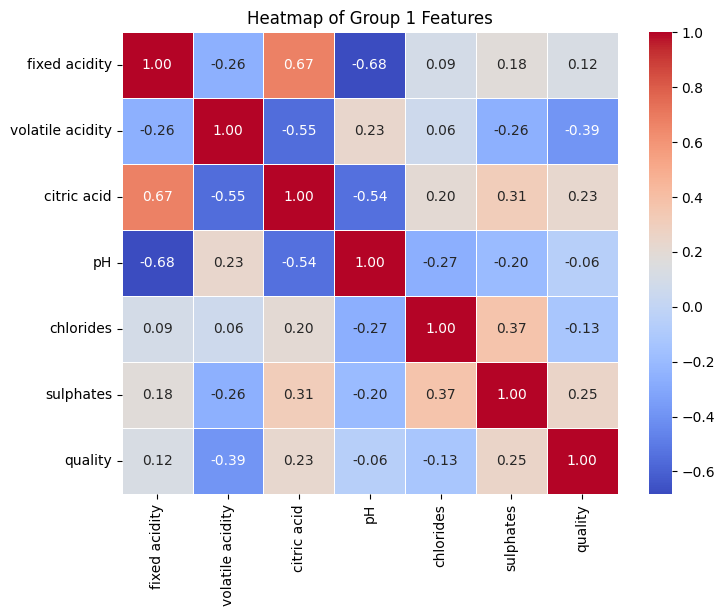

In [526]:
group1_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'chlorides', 'sulphates', 'quality']

correlation_matrix = df[group1_features].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Group 1 Features')


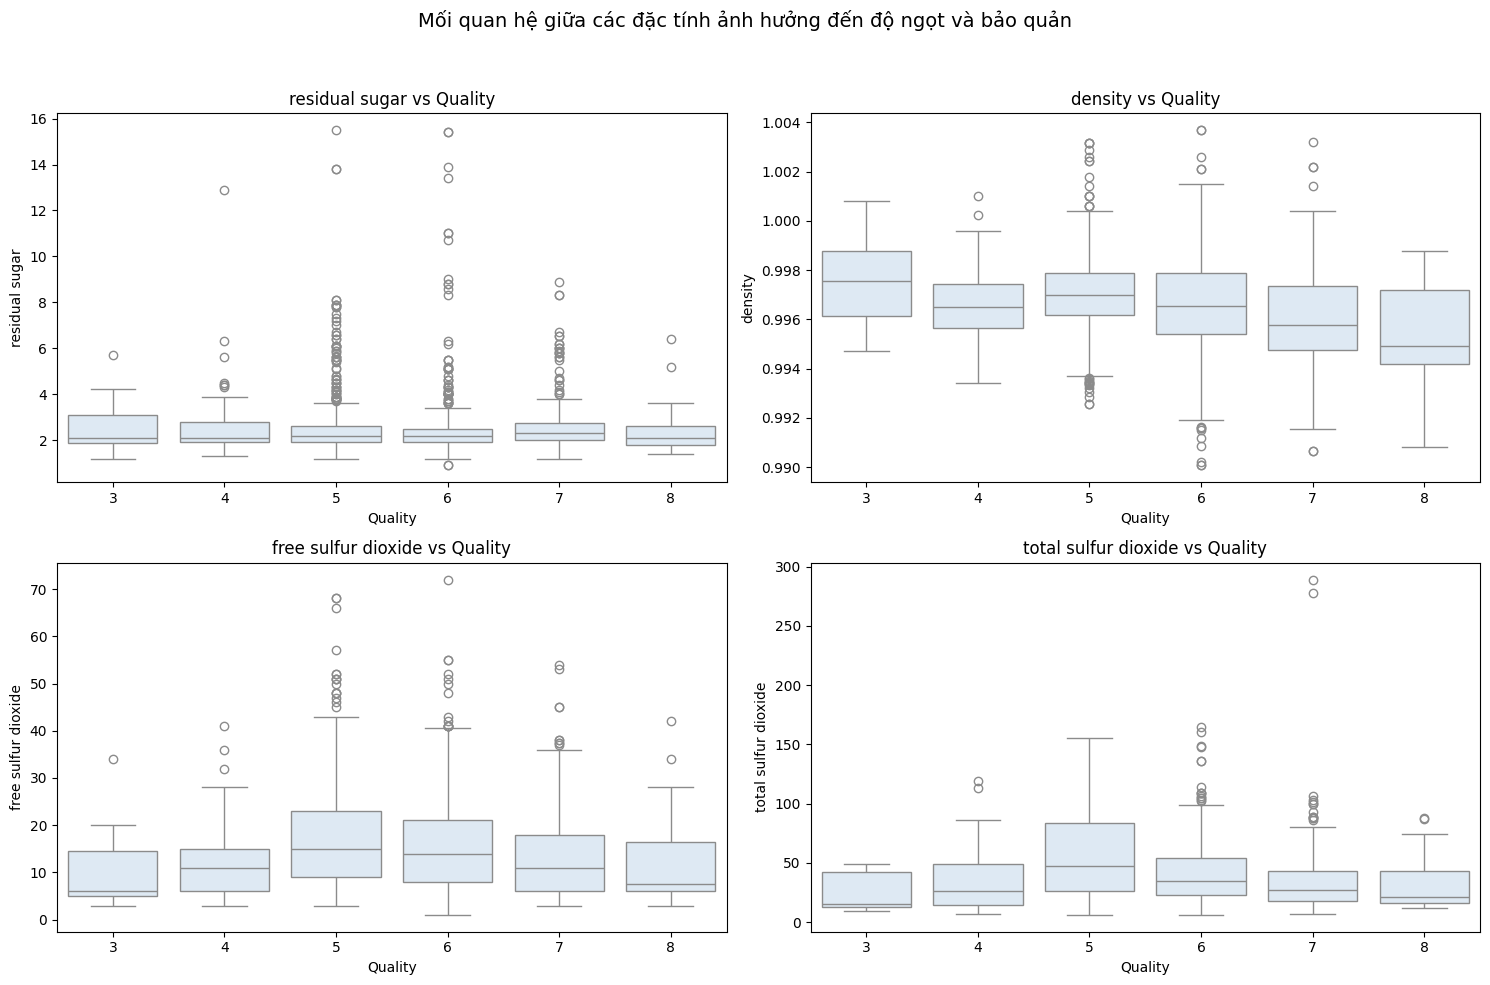

In [527]:
group2_features = ['residual sugar', 'density', 'free sulfur dioxide', 'total sulfur dioxide']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Mối quan hệ giữa các đặc tính ảnh hưởng đến độ ngọt và bảo quản", fontsize=14)

for i, col in enumerate(group2_features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df['quality'], y=df[col], ax=ax)
    ax.set_title(f"{col} vs Quality")
    ax.set_xlabel("Quality")
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])

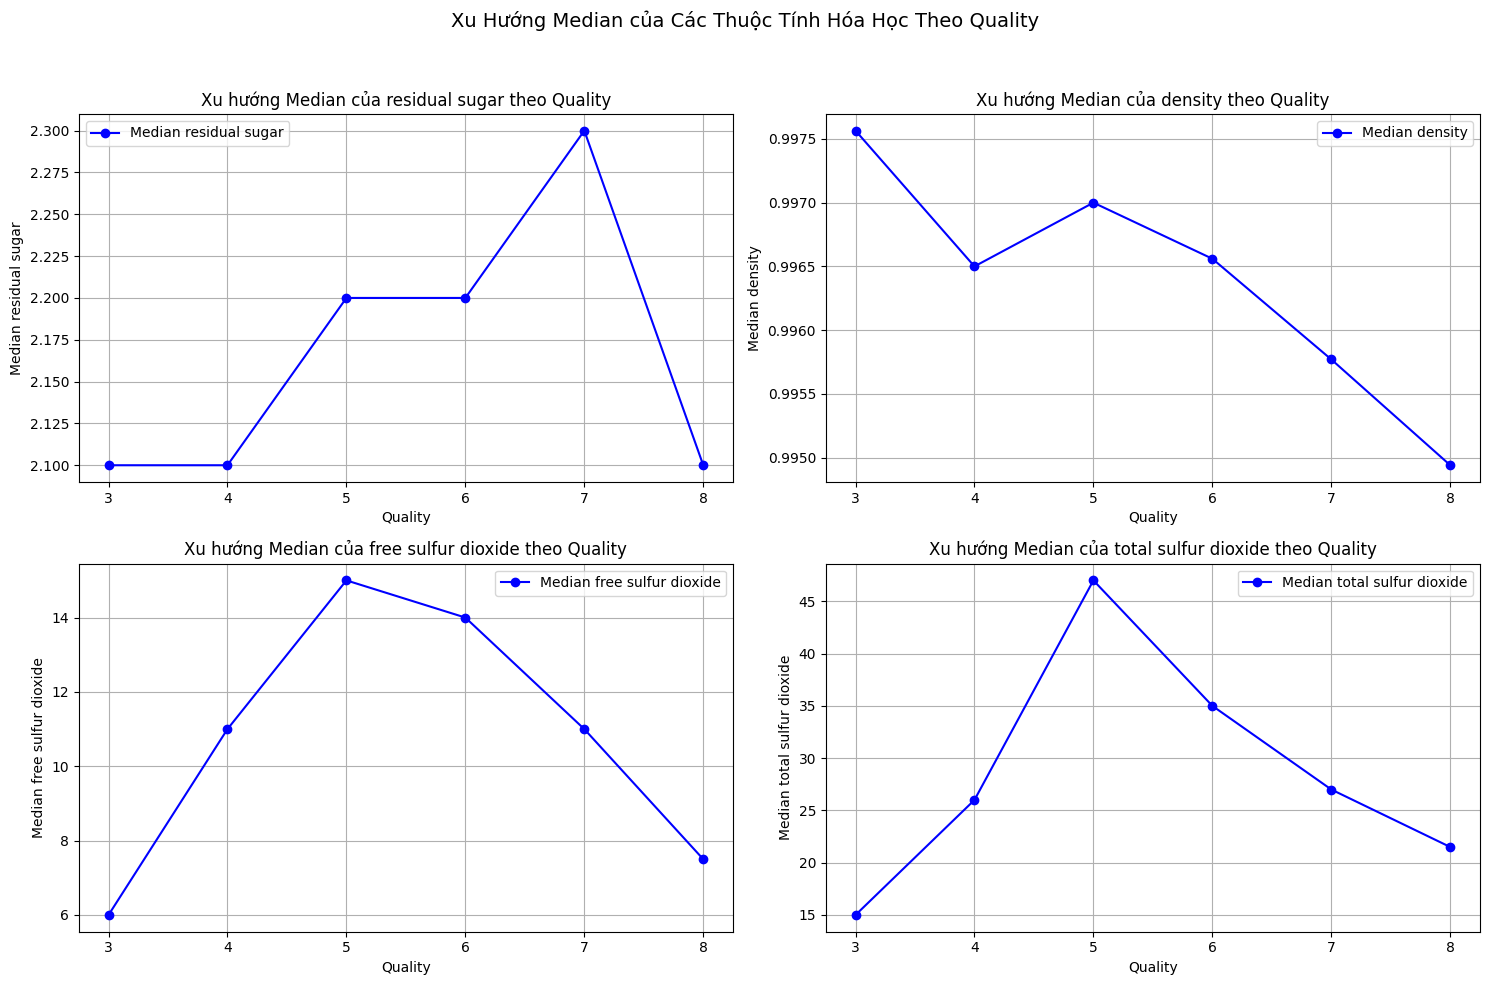

In [528]:
group2_features = ['residual sugar', 'density', 'free sulfur dioxide', 'total sulfur dioxide']

median_values = df.groupby('quality')[group2_features].median()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Xu Hướng Median của Các Thuộc Tính Hóa Học Theo Quality", fontsize=14)

for i, col in enumerate(group2_features):
    ax = axes[i // 2, i % 2]
    ax.plot(median_values.index, median_values[col], marker='o', linestyle='-', color='b', label=f"Median {col}")
    ax.set_title(f"Xu hướng Median của {col} theo Quality")
    ax.set_xlabel("Quality")
    ax.set_ylabel(f"Median {col}")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Bảng tổng hợp xu hướng và kết luận về các đặc trưng

| Đặc trưng                   | Xu hướng                                                        | Kết luận |
|-----------------------------|----------------------------------------------------------------|----------|
| **Residual Sugar** (Lượng đường còn lại) | Gần như không đổi quanh ~2.1–2.3 g/dm³; nhích lên ở 7 rồi giảm ở 8. | Ảnh hưởng yếu/phi tuyến. Không có bằng chứng rõ ràng rằng nhiều đường hơn → chất lượng cao. |
| **Density** (Mật độ) | Giảm dần khá đều (≈ 0.9978 → 0.9950). | Quan hệ âm rõ: mật độ thấp hơn (thường tương quan với alcohol cao hơn) đi kèm chất lượng cao hơn. |
| **Free Sulfur Dioxide** (Lưu huỳnh dioxit tự do) | Tăng từ 3→đỉnh ở 5 (~15 mg/dm³), sau đó giảm 6→8 (≈14 → 7 mg/dm³). | Chất lượng cao hơn thường đi với mức SO₂ tự do thấp–vừa; quá cao không cải thiện chất lượng. |
| **Total Sulfur Dioxide** (Tổng lưu huỳnh dioxit) | Tăng 3→đỉnh ở 5 (~47 mg/dm³), rồi giảm mạnh 6→8 (~35 → 22–25 mg/dm³). | Chất lượng cao có xu hướng tổng SO₂ thấp hơn; cần kiểm soát để tránh tác động xấu đến mùi vị. |


Text(0.5, 1.0, 'Heatmap of Group 2 Features')

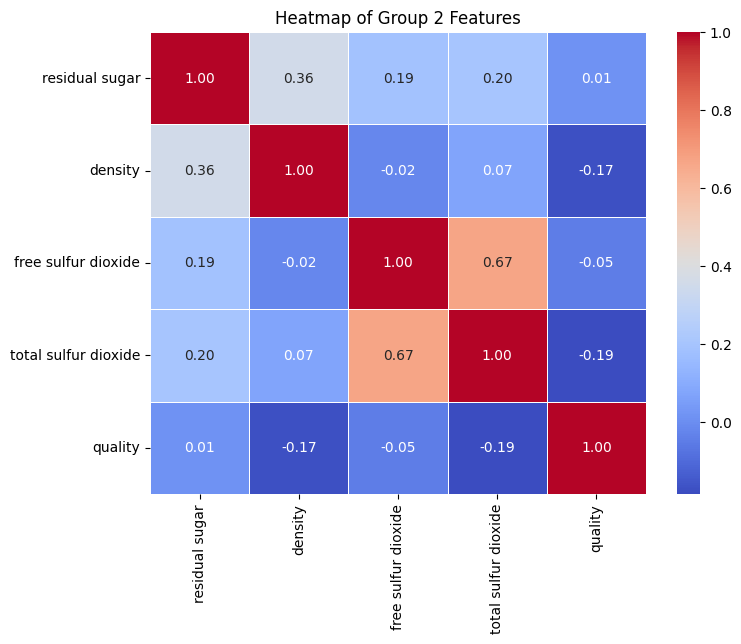

In [529]:
group2_features = ['residual sugar', 'density', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']

correlation_matrix = df[group2_features].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Group 2 Features')

# Các mối tương quan quan trọng

## Mức độ ảnh hưởng đến quality
- **Density có tương quan âm với quality (-0.31)**  
  → Mật độ càng thấp, chất lượng rượu càng cao.  
- **Total sulfur dioxide có tương quan âm với quality (-0.23)**  
  → Lượng lưu huỳnh tổng cao có thể làm giảm chất lượng rượu.  
- **Residual sugar có tương quan rất yếu với quality (-0.04)**  
  → Lượng đường không có tác động đáng kể đến chất lượng.  
- **Free sulfur dioxide có tương quan rất yếu với quality (-0.05)**  
  → Lưu huỳnh tự do cũng không ảnh hưởng mạnh.  

## Mối tương quan giữa các thuộc tính nhóm 2
- **Residual sugar có tương quan cao với density (+0.59)**  
  → Điều này hợp lý vì rượu ngọt thường có mật độ cao hơn.  
- **Total sulfur dioxide có tương quan cao với free sulfur dioxide (+0.62)**  
  → Rượu có nhiều lưu huỳnh tổng thường có nhiều lưu huỳnh tự do.  

# Có thể loại bỏ thuộc tính nào không?
### Có thể bỏ **residual sugar**, vì:
- Nó tương quan mạnh với **density (+0.59)** → có thể không cần cả hai.  
- Nó hầu như **không ảnh hưởng đến quality (-0.04)**.  

### Có thể bỏ **free sulfur dioxide**, vì:
- Nó tương quan mạnh với **total sulfur dioxide (+0.62)**.  
- Nó hầu như **không ảnh hưởng đến quality (-0.05)**.  

## Tóm lại:
- **Nếu cần giảm số lượng feature**, ta có thể **loại bỏ residual sugar và free sulfur dioxide**.  
- **Giữ lại density và total sulfur dioxide**, vì chúng có **ảnh hưởng đáng kể đến quality**.  


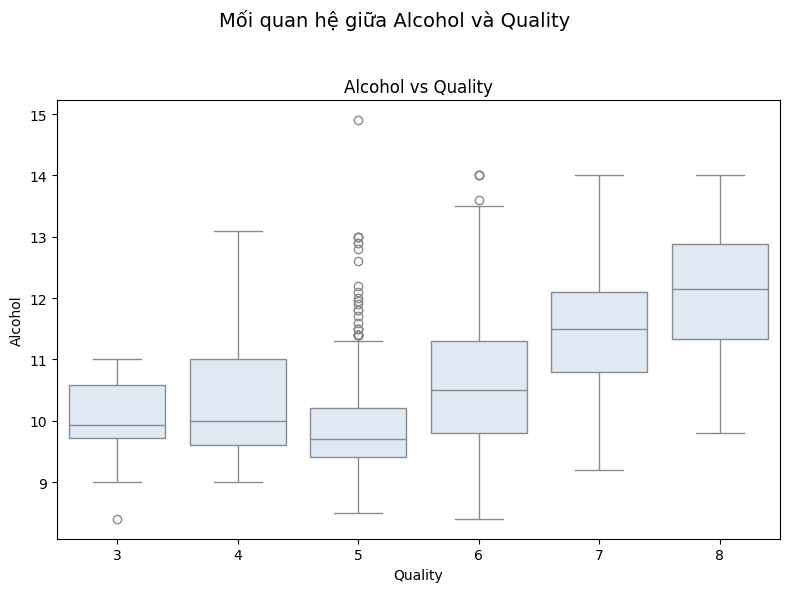

In [530]:
group3_features = ['alcohol']

fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Mối quan hệ giữa Alcohol và Quality", fontsize=14)

sns.boxplot(x=df['quality'], y=df['alcohol'], ax=ax)
ax.set_title("Alcohol vs Quality")
ax.set_xlabel("Quality")
ax.set_ylabel("Alcohol")

plt.tight_layout(rect=[0, 0, 1, 0.95])

**Quan sát từ boxplot**
* Dải quality trong dữ liệu: 3 → 8.

* Median alcohol tăng gần như đơn điệu theo quality:

  * Thấp ở 3–4 (~9–10% vol).

  * Thấp nhất quanh 5, tăng ở 6, và cao ở 7–8 (~11–12%+).

* IQR (độ rộng hộp):

  * Rộng nhất ở quality 6 (biến thiên lớn).

  * Hẹp ở quality 5 nhưng có nhiều outlier cao (>11%).

  * Quality 7–8 có IQR trung bình/khá rộng (một phần do đuôi trên kéo dài).

**Kết luận**
* Alcohol có tương quan dương mạnh với quality: nồng độ cồn cao hơn thường đi kèm chất lượng cao hơn.

* Tuy vậy, phân phối chồng lấn nhiều giữa các mức quality ⇒ alcohol một mình chưa đủ để phân loại; nên kết hợp với các biến khác (ví dụ density ↓, volatile acidity ↓, citric acid ↑, chlorides ↓, sulphates ↑ đến ngưỡng).

**Bảng tổng hợp xu hướng**

| **Đặc trưng** | 	**Xu hướng (median)** |	**Nhận xét** |
|---------------|-------------------------|----------|
| **Alcohol** |	Tăng gần như đơn điệu từ quality 3 → 8; IQR hẹp ở 5, rộng nhất ở 6, trung bình ở 7–8. |	Quan hệ dương mạnh với chất lượng; là predictor quan trọng, nhưng cần kết hợp thêm biến khác do phân phối chồng lấn. |

Text(0.5, 1.0, 'Heatmap of Group 2 Features')

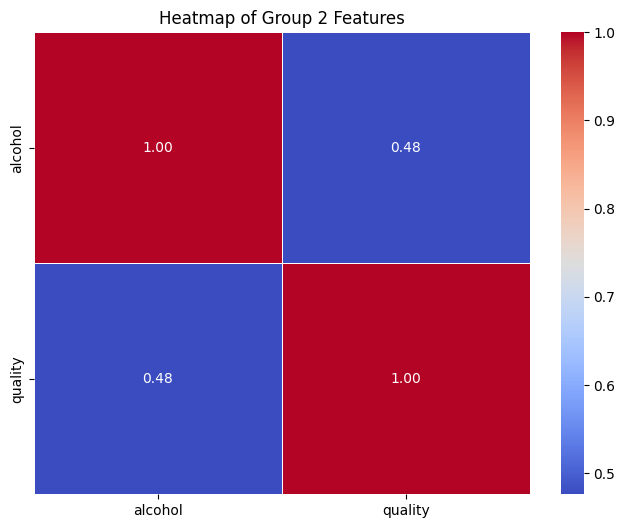

In [531]:
group3_features = ['alcohol', 'quality']

correlation_matrix = df[group3_features].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Group 2 Features')

# Hệ số tương quan (Correlation Coefficient)

## Kết quả từ Heatmap:
- **Alcohol có tương quan dương với quality (+0.44).**

### Giải thích:
- **Hệ số +0.44 là mức tương quan trung bình - mạnh**, nghĩa là **nồng độ cồn có ảnh hưởng đáng kể đến chất lượng rượu**.  
- **Rượu có nhiều cồn hơn có xu hướng được đánh giá chất lượng cao hơn**.  


# **Target Categorizing**

In [532]:
np.sort(df.quality.unique())

array([3, 4, 5, 6, 7, 8])

In [533]:
df = df.replace({'quality' : {  
                                9 : 'Good',
                                8 : 'Good',
                                7 : 'Good',
                                6 : 'Good',
                                5 : 'Bad',
                                4 : 'Bad',
                                3 : 'Bad',
        }}
)

Text(0.5, 1.0, 'Phân bố chất lượng rượu')

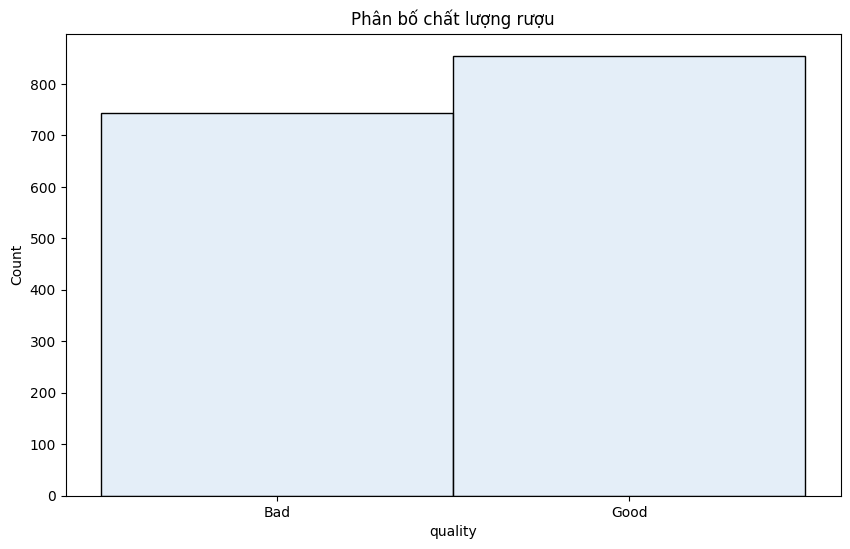

In [534]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], discrete=True, binwidth=1)
plt.title('Phân bố chất lượng rượu')

In [535]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


In [536]:
X = df.iloc[:, :-1].values
X.shape,X[:5]

((1599, 11),
 array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
        [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
         6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
        [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
         5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
        [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
         6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
        [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]]))

In [537]:
y = df.iloc[:, -1].values
y.shape, y[:5]

((1599,), array(['Bad', 'Bad', 'Bad', 'Good', 'Bad'], dtype=object))

# **Khởi tạo**

In [538]:
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good'])
    ax.yaxis.set_ticklabels(['Bad', 'Good']) 
    plt.show()

def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Blues', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

def clf_plot(y_test, y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='Blues', ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()


# **Normalization**

In [539]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# **Chia tập dữ liệu**

In [540]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [541]:
X_train_pipeline: np.ndarray = X_train.copy()
y_train_pipeline: np.ndarray = y_train.copy()

all_columns = df.columns.drop('quality')
cols_to_drop = ['fixed acidity', 'free sulfur dioxide', 'residual sugar']
col_indices = [list(all_columns).index(col) for col in cols_to_drop]

X_train_pipeline_linear = np.delete(X_train_pipeline, col_indices, axis=1)

# **RandomForestClassifier**

In [542]:
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 500}
accuracy :  0.8171006944444444


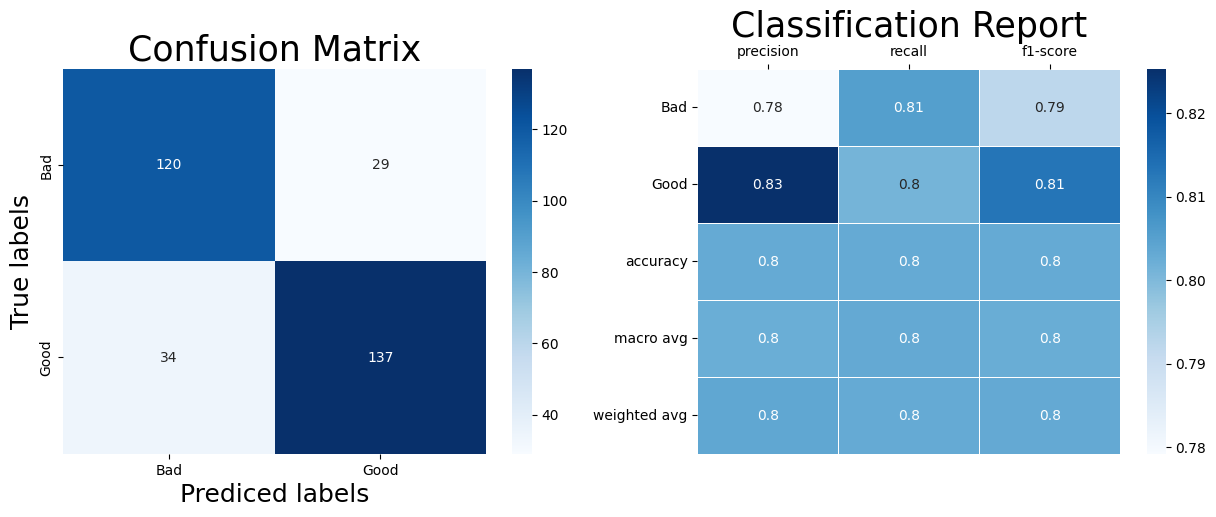

In [543]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_, class_weight="balanced").fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)
# print(classification_report(y_test, y_predict))
clf_plot(y_test, y_predict_rf)

# **LogisticRegression**

In [544]:
# df_lr = df.drop('fixed acidity', axis=1)

# df_lr = df.drop('free sulfur dioxide', axis=1)

# df_lr = df.drop('residual sugar', axis=1)

all_columns = df.columns.drop('quality')
cols_to_drop = ['fixed acidity', 'free sulfur dioxide', 'residual sugar']
col_indices = [list(all_columns).index(col) for col in cols_to_drop]

X_train_linear = np.delete(X_train, col_indices, axis=1)
X_test_linear = np.delete(X_test, col_indices, axis=1)

In [545]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train_linear, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.7396715059055119


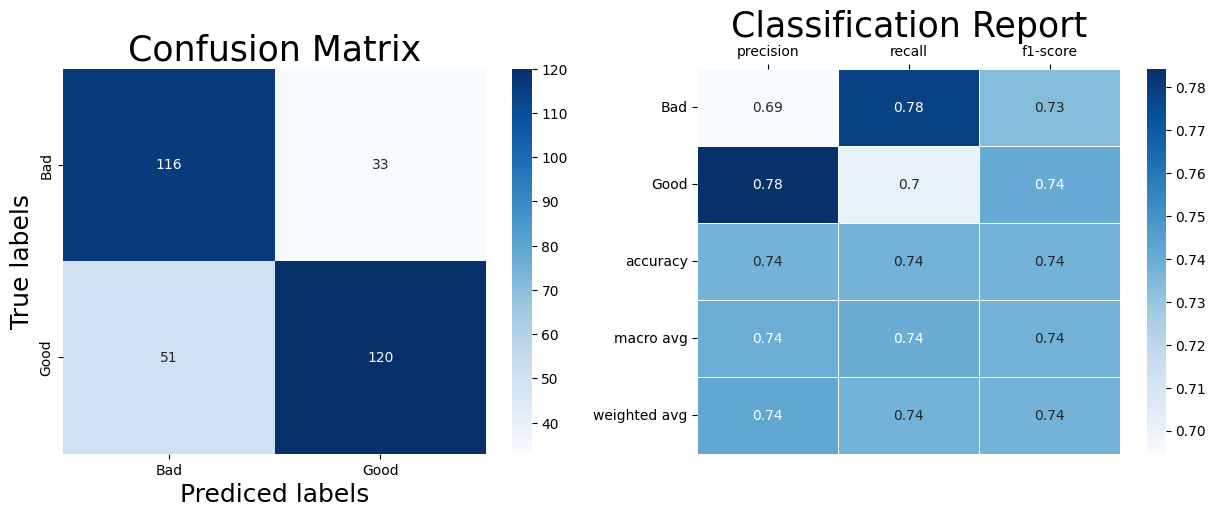

In [546]:
# Model :
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train_linear, y_train)

y_predict_lr = lr.predict(X_test_linear)
# print(classification_report(y_test, y_predict))
clf_plot(y_test, y_predict_lr)

# **SVC**

In [547]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 100, 'gamma': 1.0}
accuracy :  0.7732898622047244


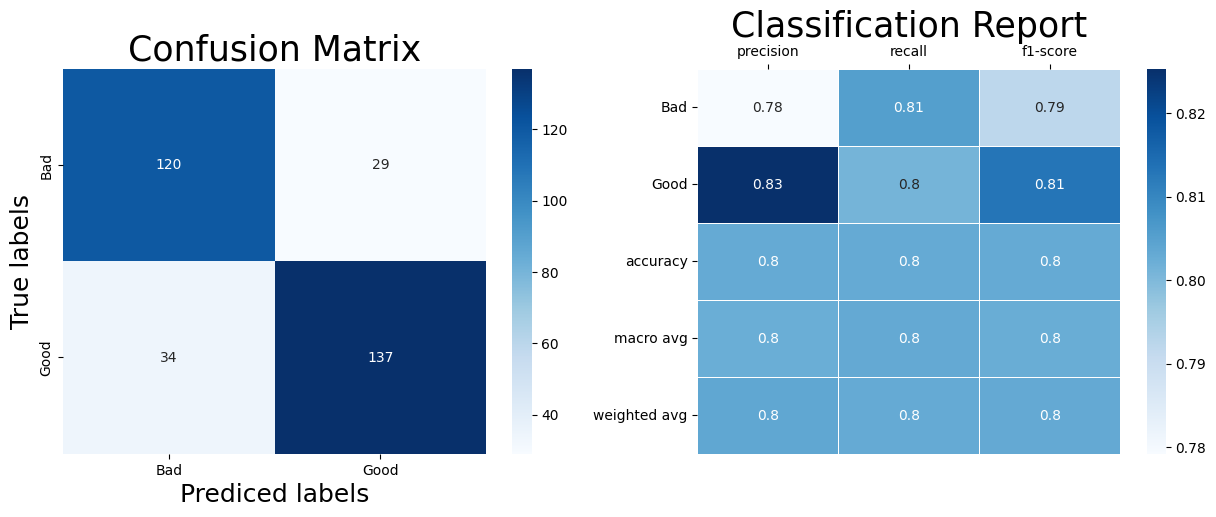

In [548]:
# Model :
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
# print(classification_report(y_test, y_predict))
clf_plot(y_test, y_predict_rf)

# **DecisionTreeClassifier**

In [549]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': np.int64(17), 'splitter': 'random'}
accuracy :  0.7607960137795275


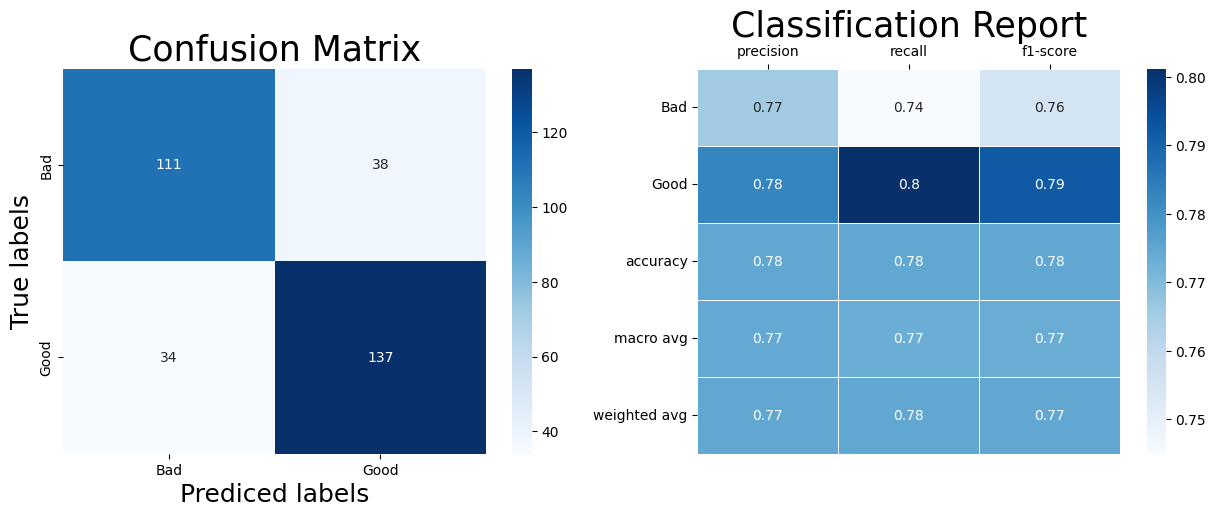

In [550]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
clf_plot(y_test, y_pred_tree)

# **KNeighborsClassifier**

In [551]:
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': np.int64(47), 'p': 1, 'weights': 'distance'}
accuracy :  0.8092642716535433


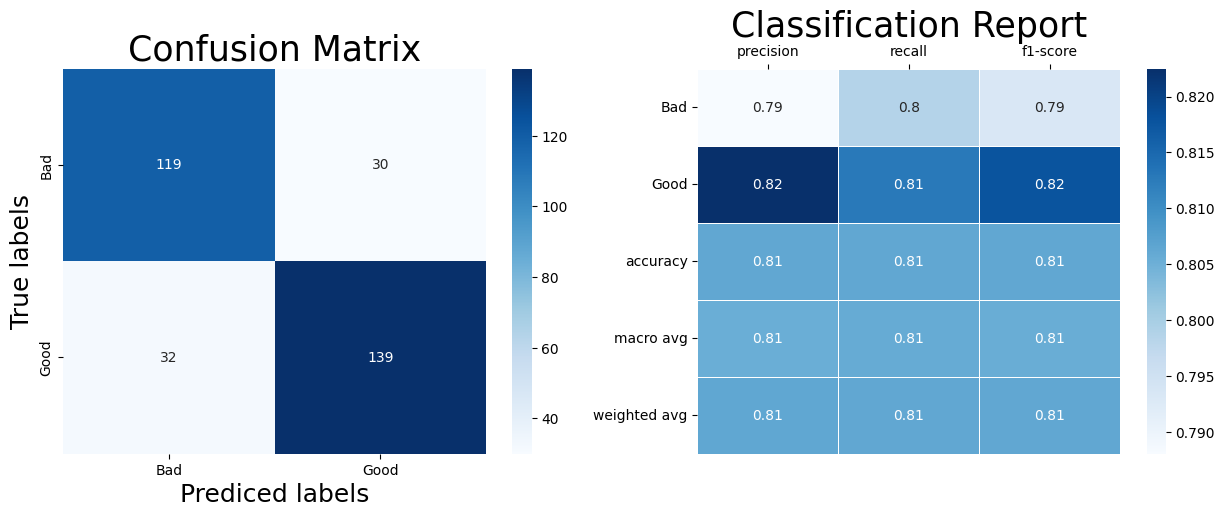

In [552]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn_cv.predict(X_test)
clf_plot(y_test, y_pred_knn)

# **Tổng hợp kết quả**

In [553]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'RandomForestClassifier': y_predict_rf,
    'LogisticRegression': y_predict_lr,
    'SVC': y_pred_svc,
    'DecisionTreeClassifier': y_pred_tree,
    'KNeighborsClassifier': y_pred_knn
}

results = []

for name, y_pred in models.items():
    results.append({
        'Algorithm': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
    })

result_df = pd.DataFrame(results)

In [554]:
display(result_df.round(3))

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.803,0.802,0.803,0.803
1,LogisticRegression,0.738,0.739,0.740,0.737
2,SVC,0.769,0.770,0.771,0.769
3,DecisionTreeClassifier,0.775,0.774,0.773,0.774
4,KNeighborsClassifier,0.806,0.805,0.806,0.805


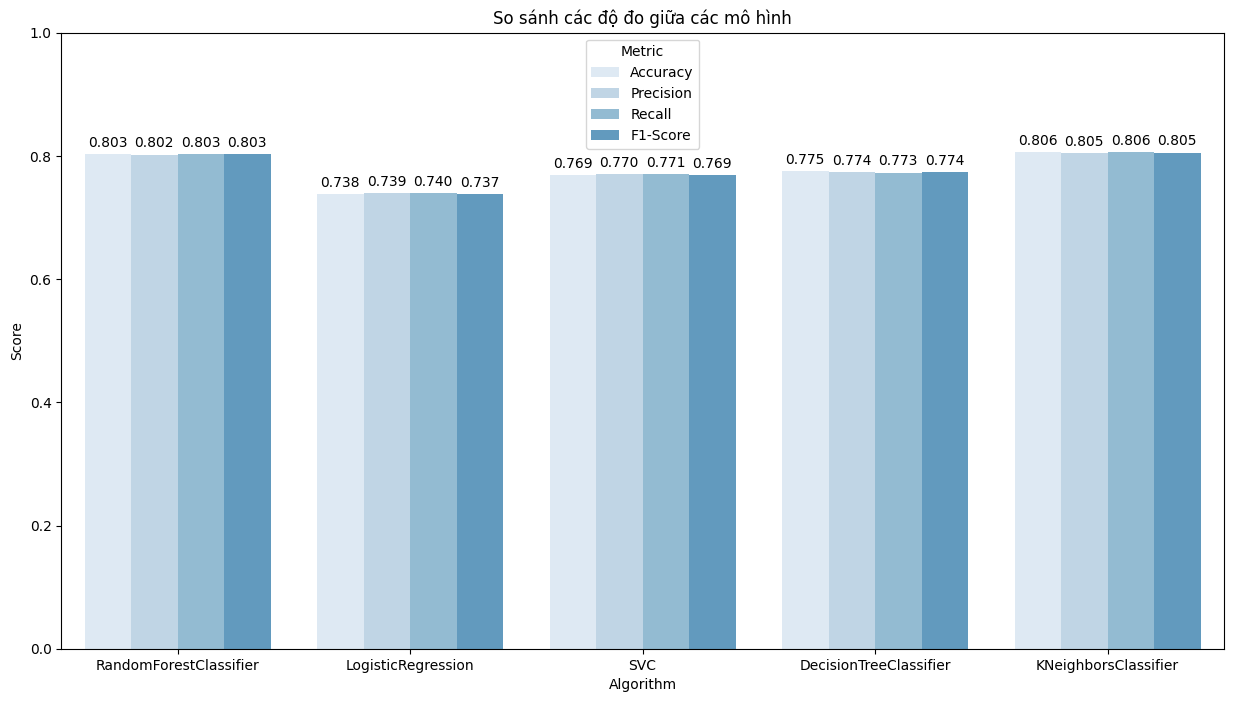

In [555]:
result_melted = result_df.melt(id_vars='Algorithm',
                                value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=result_melted)
plt.title("So sánh các độ đo giữa các mô hình")
plt.ylim(0, 1)
plt.legend(title='Metric')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.show()

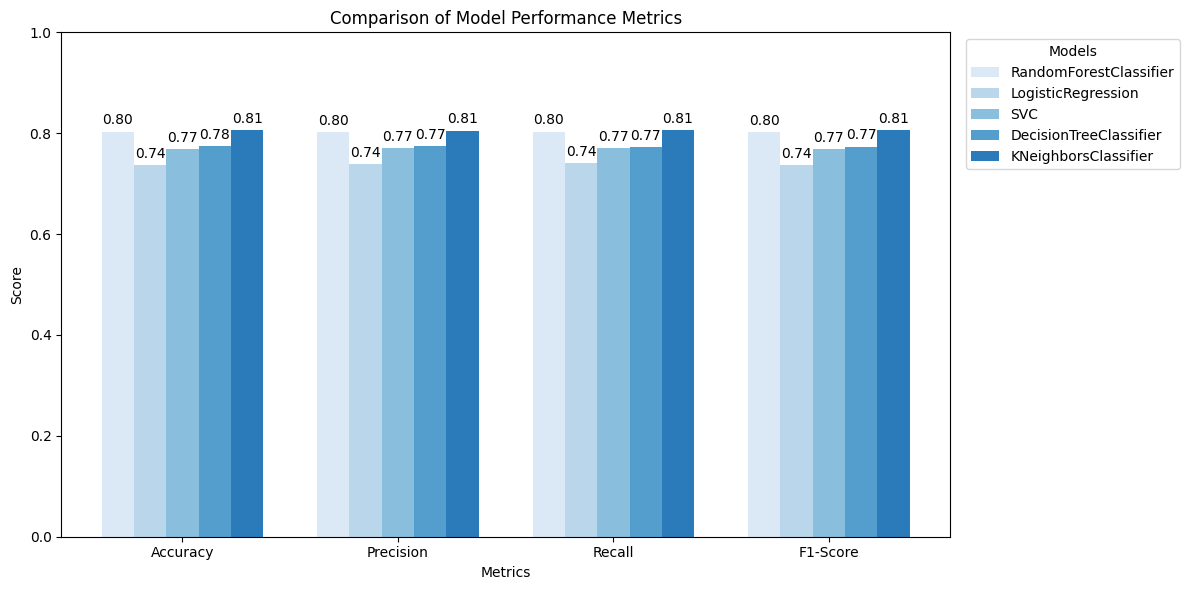

In [556]:
models = result_df['Algorithm'].tolist()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = result_df[metrics].to_numpy().T

x = np.arange(len(metrics))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    bar = ax.bar(x + i * bar_width, scores[:, i], width=bar_width, label=model)
    ax.bar_label(bar, fmt='%.2f', padding=3)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x + (bar_width * (len(models) - 1)) / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend(title='Models', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [557]:
from sklearn.pipeline import Pipeline
import os
import joblib

os.makedirs("models", exist_ok=True)

models = {
    'rf': (RandomForestClassifier, {**rf_cv.best_params_, 'class_weight': 'balanced'}),
    'lr': (LogisticRegression, lr_cv.best_params_),
    'svc': (SVC, svc_cv.best_params_),
    'tree': (DecisionTreeClassifier, tree_cv.best_params_),
    'knn': (KNeighborsClassifier, knn_cv.best_params_)
}

for name, (ModelClass, params) in models.items():
    model = ModelClass(**params)
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', model)
    ])

    if name == 'lr':
        X_train_used = X_train_pipeline_linear
        y_train_used = y_train_pipeline
    else:
        X_train_used = X_train_pipeline
        y_train_used = y_train_pipeline

    pipe.fit(X_train_used, y_train_used)
    joblib.dump(pipe, f"models/{name}.pkl")
    print(f"Saved: models/{name}.pkl")

Saved: models/rf.pkl
Saved: models/lr.pkl
Saved: models/svc.pkl
Saved: models/tree.pkl
Saved: models/knn.pkl
